In [1]:
import numpy as np
import dynesty
import dynesty.plotting
import matplotlib.pyplot as plt
import warnings
from common import Problem

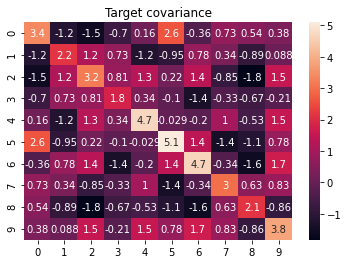

In [2]:
problem = Problem(10)
problem.plot_cov();

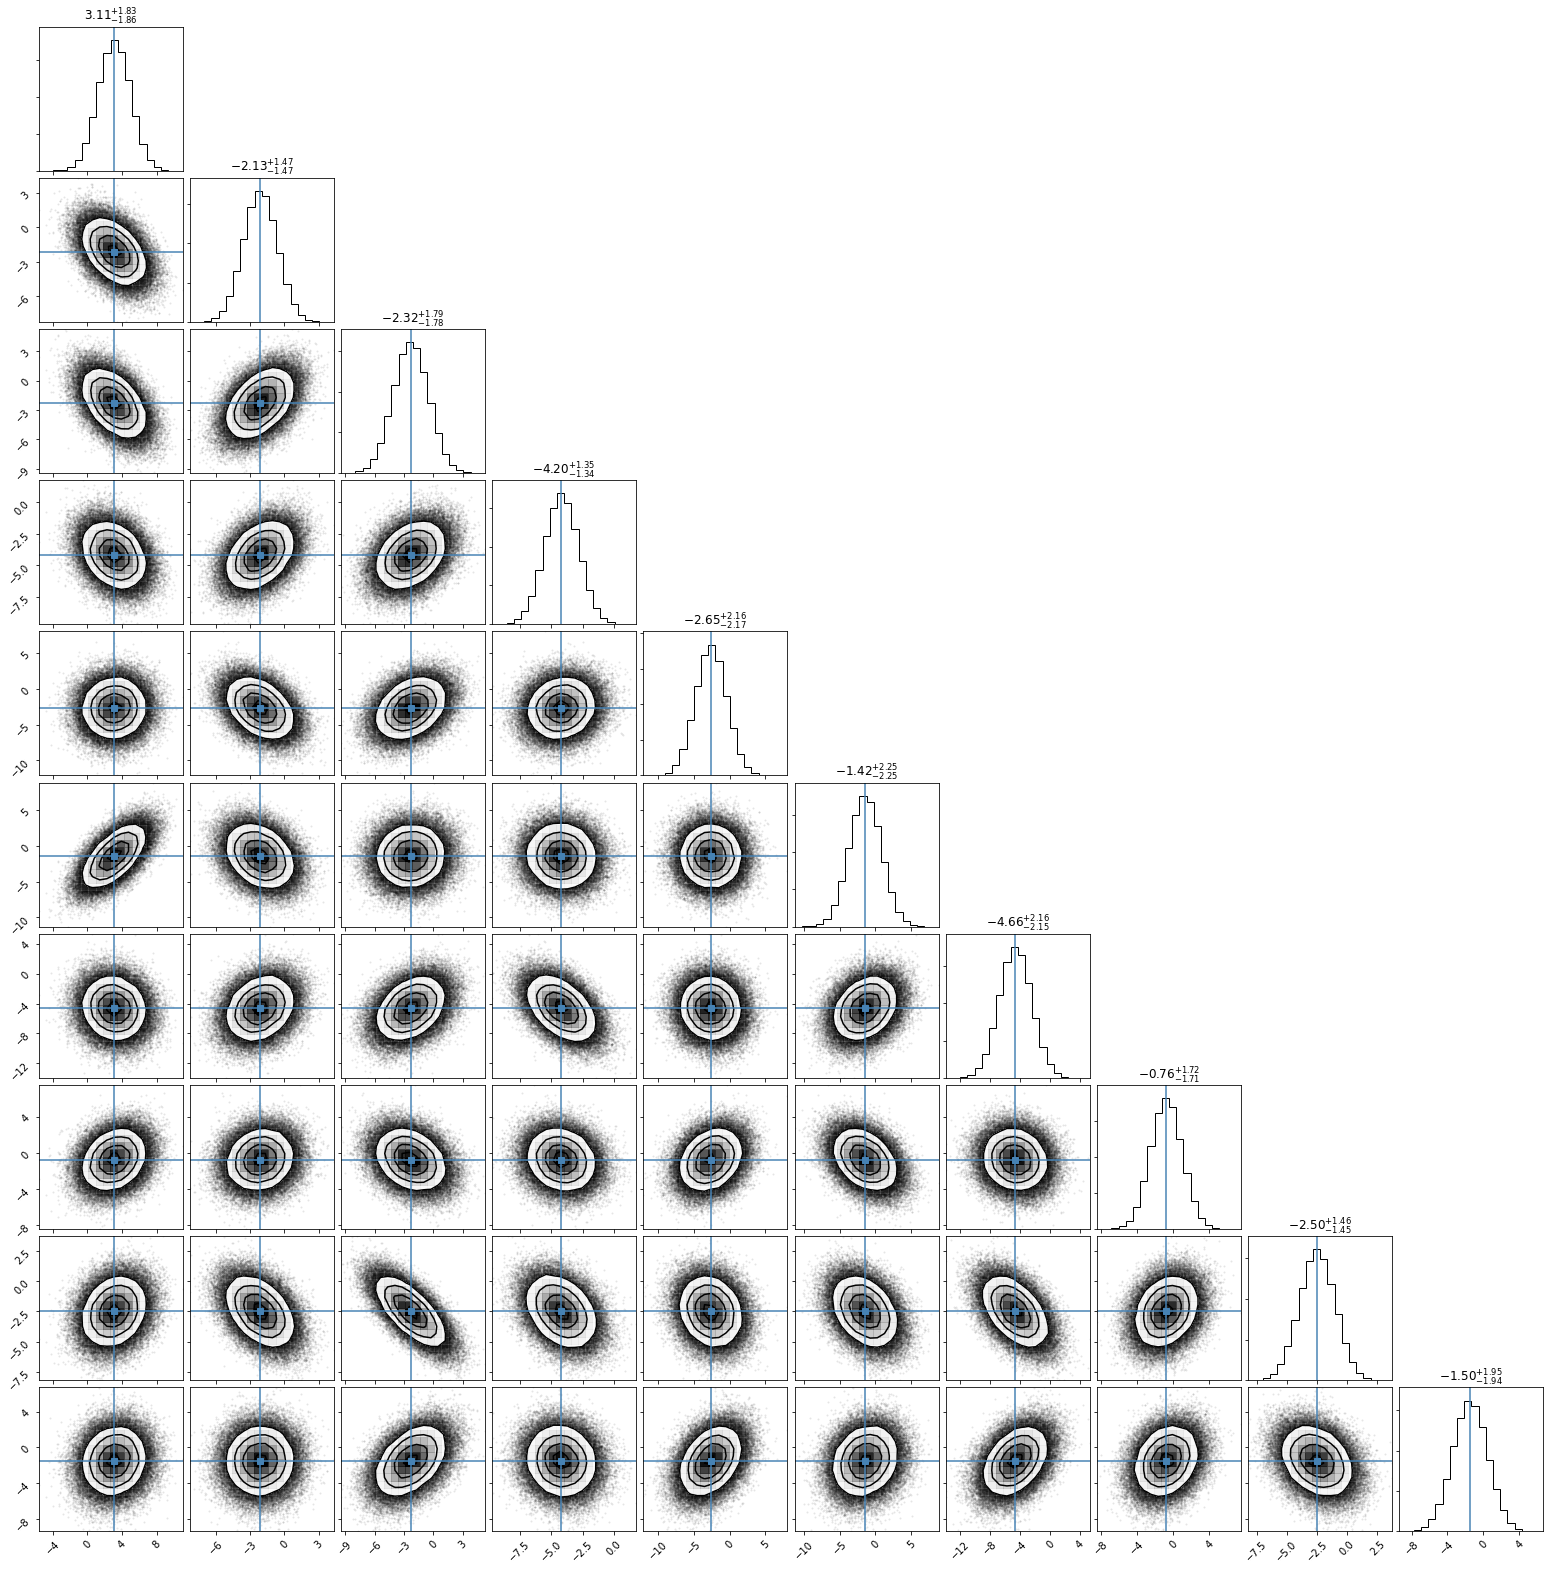

In [3]:
problem.plot_rvs();

In [4]:
problem.reset_ncall()
sampler = dynesty.DynamicNestedSampler(problem.lnL, problem.u_to_x, problem.ndim)#, bounds='single', nlive=1000)#, first_update={'min_eff': 20.})#, bound='single')

In [5]:
dynesty.dynamicsampler.stopping_function?

Signature:
dynesty.dynamicsampler.stopping_function(
    results,
    args=None,
    rstate=None,
    M=None,
    return_vals=False,
)
Docstring:
The default stopping function utilized by :class:`DynamicSampler`.
Zipped parameters are passed to the function via :data:`args`.
Assigns the run a stopping value based on a weighted average of the
stopping values for the posterior and evidence::

    stop = pfrac * stop_post + (1.- pfrac) * stop_evid

The evidence stopping value is based on the estimated evidence error
(i.e. standard deviation) relative to a given threshold::

    stop_evid = evid_std / evid_thresh

The posterior stopping value is based on the fractional error (i.e.
standard deviation / mean) in the Kullback-Leibler (KL) divergence
relative to a given threshold::

    stop_post = (kld_std / kld_mean) / post_thresh

Estimates of the mean and standard deviation are computed using `n_mc`
realizations of the input using a provided `'error'` keyword (either
`'jitter'` or `'simula

In [6]:
with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
    sampler.run_nested(
#         wt_kwargs={"pfrac": 1.0},
        stop_kwargs={"post_thresh": 0.04},
        dlogz_init=0.25,
#         dlogz=0.5,
#         nlive_init=500,
#         nlive_batch=500,
        # maxcall=100_000,
    )

11386it [00:46, 245.28it/s, batch: 0 | bound: 124 | nc: 1 | ncall: 246013 | eff(%):  4.628 | loglstar:   -inf < -0.503 <    inf | logz: -20.917 +/-  0.272 | dlogz:  0.001 >  0.250]   


In [7]:
problem.ncall

246013

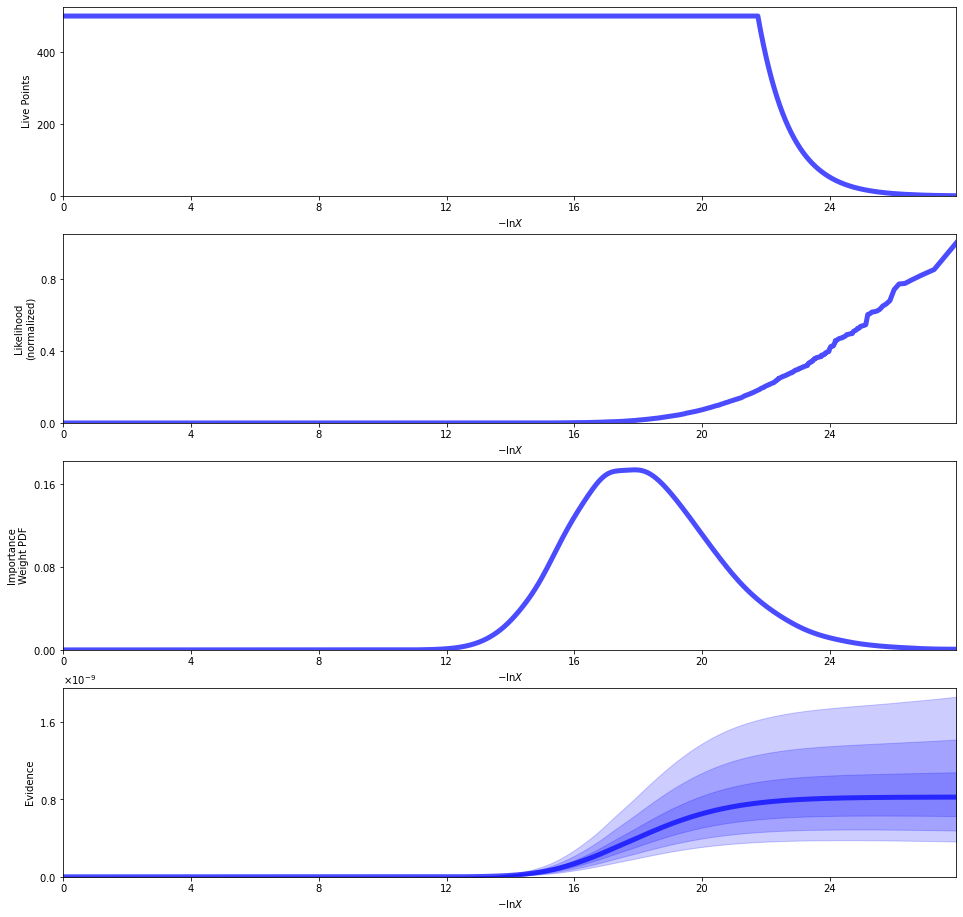

In [8]:
dynesty.plotting.runplot(sampler.results);

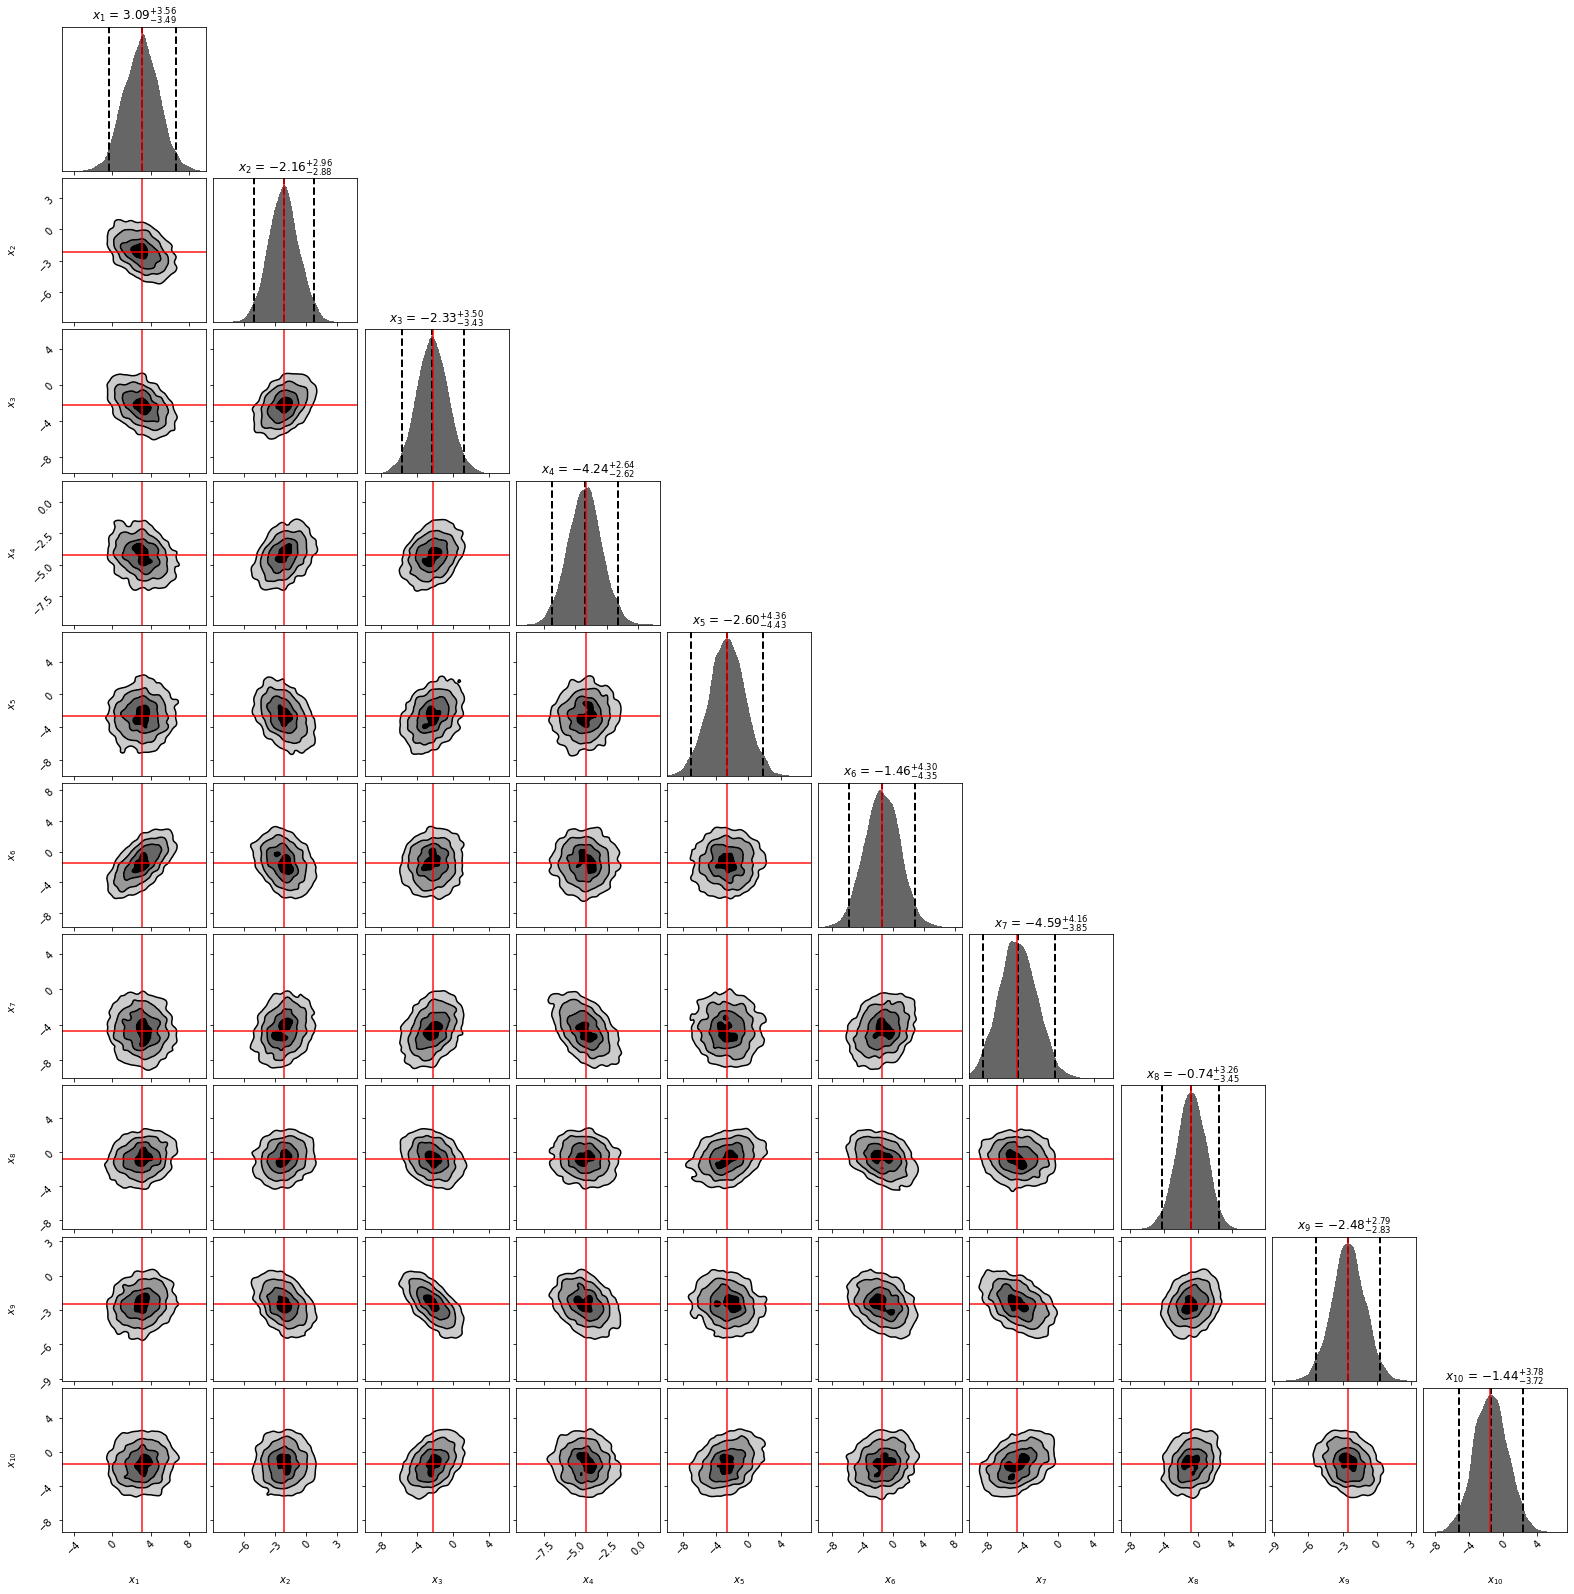

In [9]:
dynesty.plotting.cornerplot(sampler.results, show_titles=True, truths=problem.means);